In [107]:
# CAPSTONE TWO - EDA

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


os.chdir('/Users/andrew/Desktop/Capstone Two')

In [108]:
df = pd.read_csv('housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [109]:
df.shape #545 rows, 13 columns

(545, 13)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [111]:
# Search for missing values / NA / NaN

df.isnull().sum()

# No missing values found

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [112]:
# Summary Statistics

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [113]:
# Check for Duplicated rows

df.duplicated().sum()

# No duplicate rows in the data

0

''

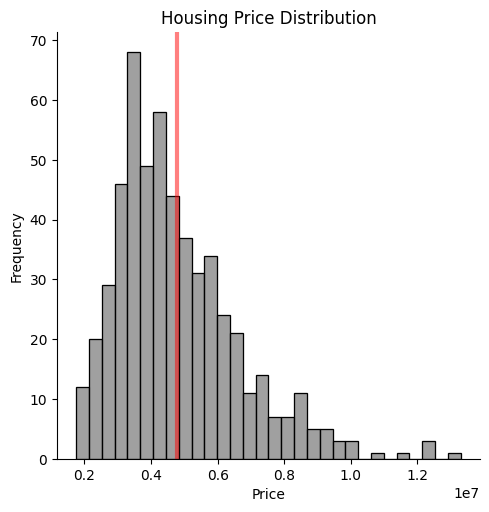

In [114]:
# Housing price distribution

pricemean = df['price'].mean()

sns.displot(df['price'], bins=30, color='gray')
plt.axvline(pricemean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
;

''

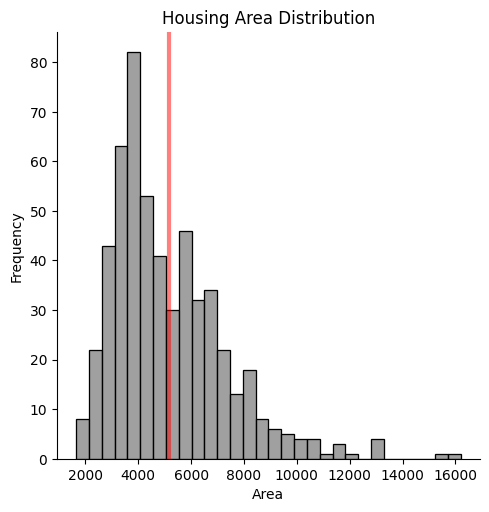

In [115]:
# Housing area distribution

areamean = df['area'].mean()

sns.displot(df['area'], bins=30, color='gray')
plt.axvline(areamean, color='red', linewidth=3, alpha=0.5)
plt.title('Housing Area Distribution')
plt.xlabel('Area')
plt.ylabel('Frequency')
;


# Area and price seem to have a correlation

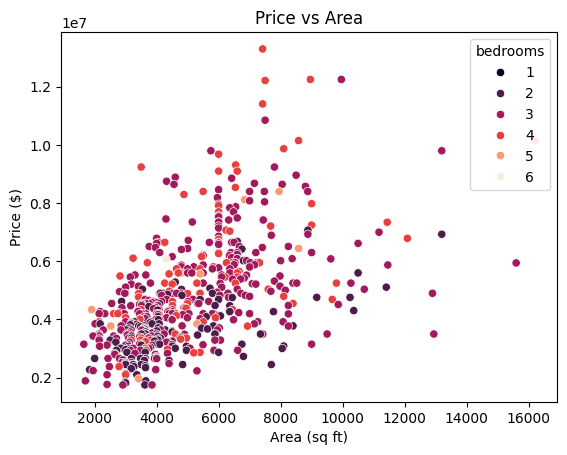

In [116]:
# Area VS Price

sns.scatterplot(x='area', y='price', data=df, hue='bedrooms', palette='rocket')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')

plt.show();

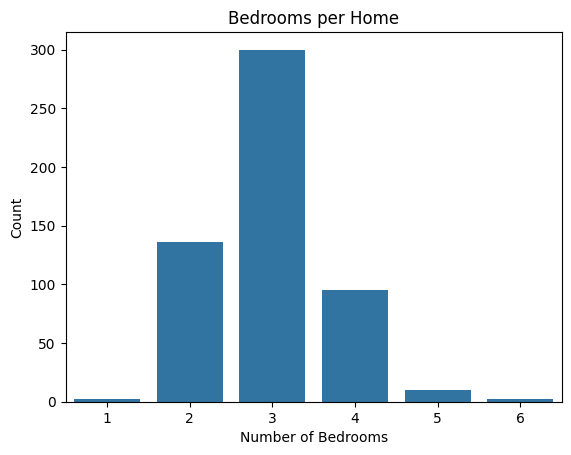

In [117]:
# Bedrooms countplot

sns.countplot(x='bedrooms', data=df)
plt.title("Bedrooms per Home")
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show();

# 3 bedrooms is most common for houses in the dataset

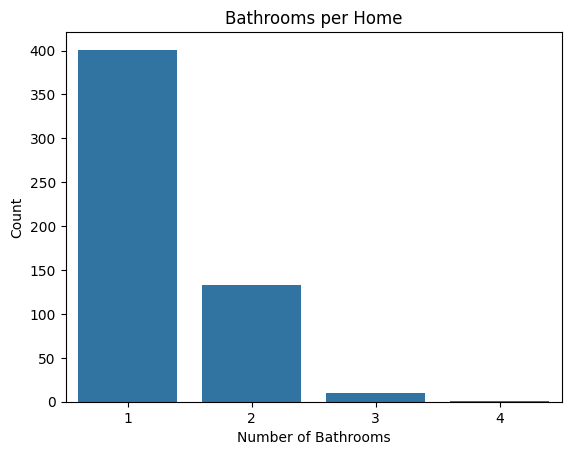

In [118]:
# Bathrooms countplot

sns.countplot(x='bathrooms', data=df)
plt.title("Bathrooms per Home")
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show();

# 1 bathroom is most common for houses in the dataset

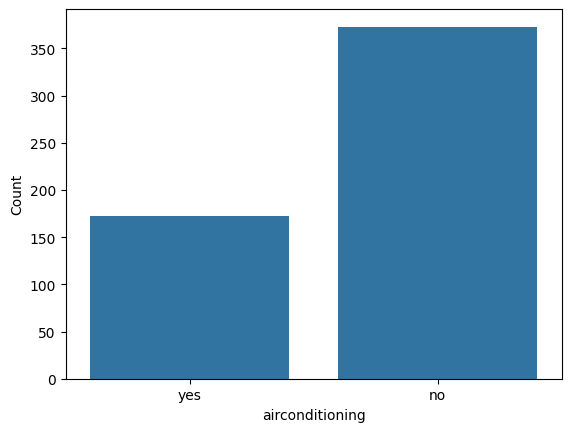

In [119]:
# Does the property have A/C?

sns.countplot(x='airconditioning', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have A/C

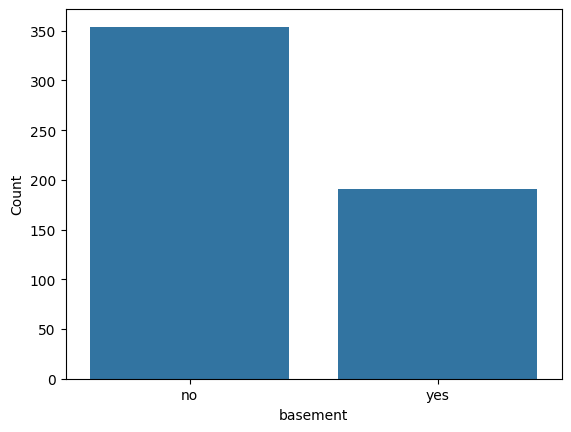

In [120]:
# Does the property have a basement?

sns.countplot(x='basement', data=df)
plt.ylabel('Count')
plt.show();

# Majority of houses in the dataset dont have a basement

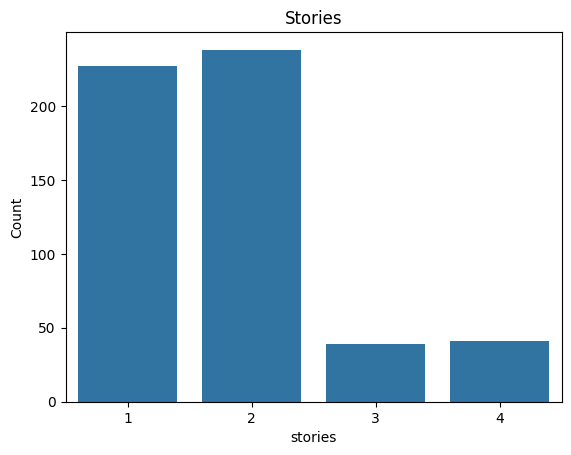

In [121]:
# Number of stories

sns.countplot(x='stories', data=df)
plt.title("Stories")
plt.ylabel('Count')
plt.show();

# Most homes have 1 or 2 stories, with some having up to 4

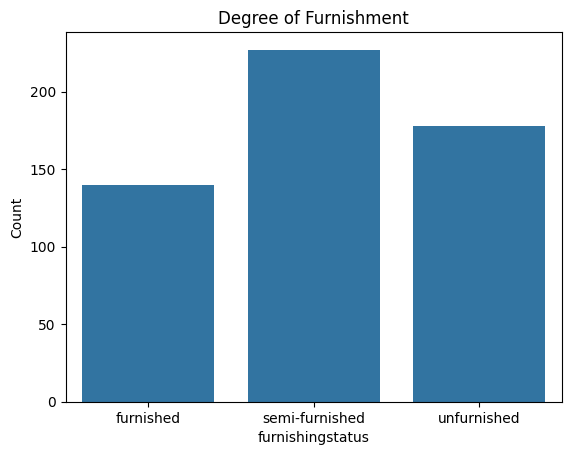

In [122]:
# Furnish countplot

sns.countplot(x='furnishingstatus', data=df)
plt.title("Degree of Furnishment")
plt.ylabel('Count')
plt.show();

In [123]:
# For modelling purposes, category columnns to be converted to numeric
# Replace YES with 1, NO with 0
df = df.applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))

# For furnishing status, replace furnished with 1, semi furnished with 0.5, and unfurnished with 0

df['furnishingstatus'] = df['furnishingstatus'].replace({
    'furnished':1,
    'semi-furnished':0.5,
    'unfurnished':0
})

/var/folders/pg/4h08z3252px0d9j8fr1zvbrc0000gn/T/ipykernel_38668/3904290694.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x == 'yes' else (0 if x == 'no' else x))
/var/folders/pg/4h08z3252px0d9j8fr1zvbrc0000gn/T/ipykernel_38668/3904290694.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace({


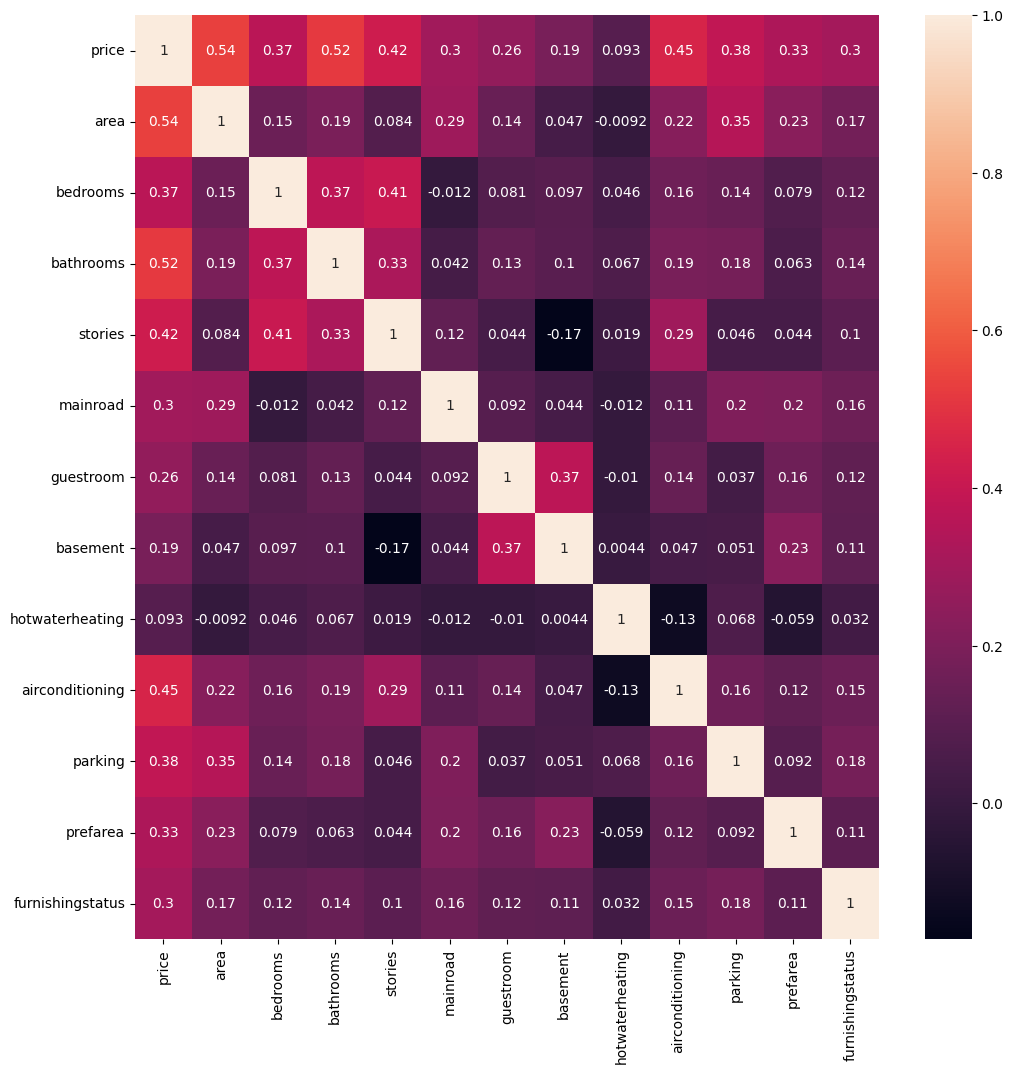

In [124]:
# Correlation Heatmap

plt.subplots(figsize=(12,12))
correlations = df.corr()
sns.heatmap(correlations, annot=True);

# Price is correlated most with area, bathrooms, air conditioning and stories of the house

In [125]:
# Feature Engineering

# Price / Area

df['Price_Per_Area'] = df['price'] / df['area']

# Total rooms

df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + df['guestroom']

In [126]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price_Per_Area,total_rooms
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1.0,1792.452830,6
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1.0,1367.187500,8
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0.5,1229.919679,5
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1.0,1628.666667,6
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1.0,1537.735849,6


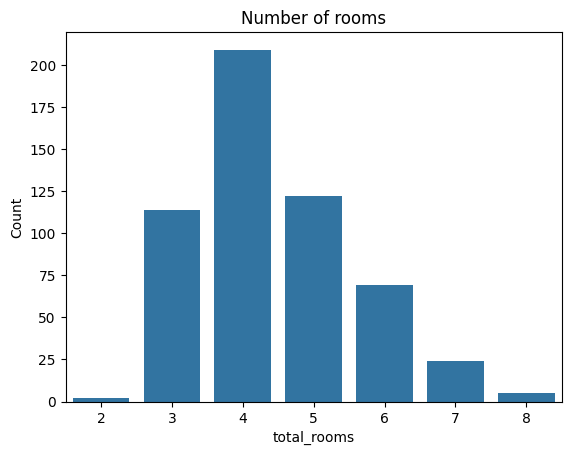

In [127]:
# Total rooms

sns.countplot(x='total_rooms', data=df)
plt.title("Number of rooms")
plt.ylabel('Count')
plt.show();

# From bedrooms, bathrooms, and guestrooms, most properties have 4.

On average, you can expect to pay 993.3269783651732 per square foot


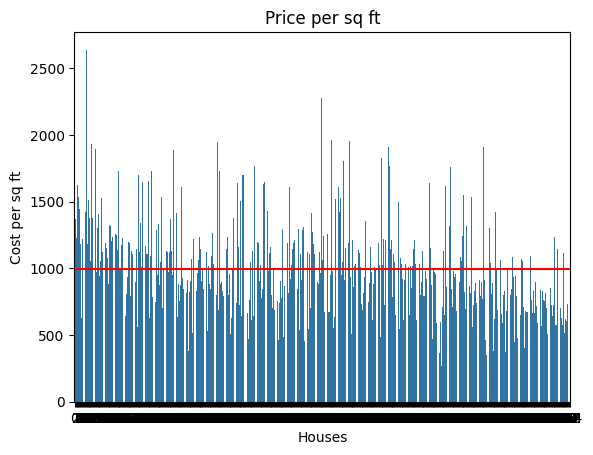

In [128]:

meanprice = df['Price_Per_Area'].mean()

sns.barplot(df['Price_Per_Area'])
plt.axhline(meanprice, color='red')
plt.title('Price per sq ft')
plt.xlabel('Houses')
plt.ylabel('Cost per sq ft')
;

print(f"On average, you can expect to pay",meanprice,"per square foot")

In [129]:
df.shape

(545, 15)

### Exploratory Data Analysis Summary

* The dataset contained no missing values or duplicated rows.
* 3 bedrooms with 1 bathroom is most common for homes in the dataset.
* 1-2 stories is common, with some homes having up to 4.
* The price of a home is correlated most with the area (in sq ft), number of bathrooms, air conditioning, and number of stories the house contains.
* On average, you can expect to pay approximately $993 per square foot of property.